#Non-Linear Regression Techniques

<small>Amogh Shreedhar Inamdar</small>

##Non-Linear Regression

Regression is a statistical method of estimating the relationships between an outcome/response variable and several predictor variables. Non-Linear regression attempts to model the outcome as a non-linear combination of predictor variables. This is mathematically represented as 
$$ y \sim f(x, \beta) $$

where $y$ is the response variable, $x$ is a vector of predictor variables, and $\beta$ is a vector of regression parameters respectively. 

###Polynomial Regression

Polynomial Regression models the relationship between predictor variables and a response variable as an n-degree polynomial. It can be viewed as similar to Linear Regression, but with at some of the predictors being powers of the actual predictor variables. For a single predictor variable, an n-degree polynomial can be represented as 
$$ y = \beta_0 + \beta_1x + \beta_2x^2 + \cdots + \beta_nx^n $$
where $y$ is the response variable, $x$ is the predictor variable and each $\beta_i$ is a regression coefficient.  

Polynomial regression is able to model non-linear relationships between predictors and a response. Many naturally occurring relations are non-linear. The best-fit curve can be found using Gradient Descent, as with other regression methods like Multiple Linear Regression.  

It is important to note that the features are polynomial, but the equation remains linear in the transformed features, for a Polynomial Regression model.



Polynomial Regression Model:
 [ 0.         -0.02076581  0.02986368] 



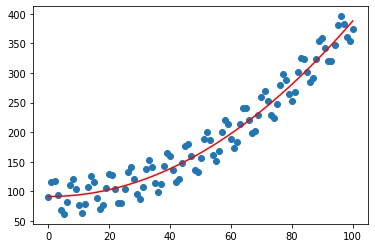

In [0]:
# Polynomial Regression Example

import math
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt

P = np.array(list(range(0, 101)))  # a simple predictor variable ranging from 0 to 100
r = 90 + P * P * 0.03 + [30 * math.sin(i) for i in P] # a response variable with sinusoidal noise

P1 = P[:, np.newaxis]
# plot the points
plt.scatter(P, r)

# generate the polynomial features of the predictor
pf = PolynomialFeatures(2)
P_poly = pf.fit_transform(P1)
print()

# use scikit-learn for a linear model with the polynomial features
lm = linear_model.LinearRegression()
pol = lm.fit(P_poly, r)
print("Polynomial Regression Model:\n", pol.coef_, "\n")

pred_pol = pol.predict(P_poly)

# plot the regression line, shown in red 
plt.plot(pred_pol, color='red')

plt.show()

###Support Vector Regression (SVR)

Support Vector Regression aims to minimize the $l_2$ norm of the weight vector of a linear regression model. It is mathematically represented as 
$$ min \,\, \frac{1}{2} \|\beta\|^2  $$
subject to the constraints $$ |y_i - \beta_i x_i| \leq \epsilon $$
for a given coefficient vector $\beta$ that corresponds to the linear model given by $$ Y - \beta X $$  

The goal of Support Vector Regression is to restrict the error rate to below a certain threshold. The error is restricted to a range of $\pm\epsilon$ from the true relationship between the predictors and response. This relationship may be linear or non-linear, and hence SVR can be considered a non-linear regression method.

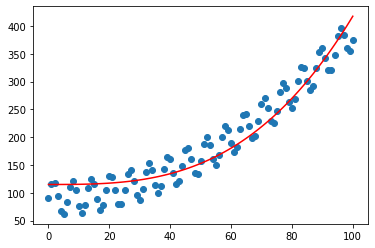

In [0]:
# support vector regression example

from sklearn import svm

# plot the points
plt.scatter(P, r)

# use scikit-learn for support vector regression
svr = svm.SVR(kernel="poly")
svr_model = svr.fit(P.reshape(-1, 1), r)

# predict and plot the regression line
pred_svr = svr_model.predict(P.reshape(-1, 1))

# plot the regression line, shown in red 
plt.plot(pred_svr, color='red')

plt.show()

###Decision Tree Regression

Decision Tree Regression uses decision trees to model the relationship between predictor variables and a response variable. Unlike other regression methods that produce a continuous output, decision trees usually approximate the response to a particular value for a given range of predictor variable values. Criteria like Standard Deviation Reduction are used to determine the best split decisions.

The Decision Tree Regression algorithm consists of several steps:
1. The dataset is partitioned into subsets that contain similar values of a predictor.
2. The partition with the greatest quality (eg. the largest standard deviation reduction) is chosen as the tree split.
3. This process is repeated for each of the new child nodes and remaining predictors.
4. The algorithm terminates once all predictors have been accounted for.
5. The model is used by choosing the leaf node that has contains the data point all its predictor value ranges, and the value of the leaf node is the predicted response.


An example of Decision Tree Regression worked out on a small dataset can be found [here](https://saedsayad.com/decision_tree_reg.htm).

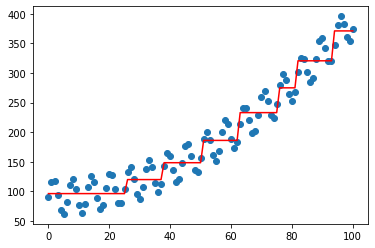

In [0]:
# decision tree regression example

from sklearn import tree

# plot the points
plt.scatter(P, r)

# use scikit-learn for decision tree regression
tr = tree.DecisionTreeRegressor(max_depth=3)  # try changing the depth to see overfitting/underfitting!
tr_model = tr.fit(P.reshape(-1, 1), r)

# predict and plot the regression line
pred_tr = tr_model.predict(P.reshape(-1, 1))

# plot the regression line, shown in red 
plt.plot(pred_tr, color='red')

plt.show()

###Random Forest Regression

Random Forest Regression uses the random forest algorithm to perform regression between predictors and a response. The random forest algorithm is an Ensemble method that uses the votes of multiple decision trees to devide the predicted value. 

The algorithm for Random Forest Regression is given below:
1. Pick $k$ random data points from the dataset.
2. Build a decision tree from each data point.
3. Repeat these steps till the desired number of trees is built.
4. Predict the response for a data point by averaging the predictions of each decision tree for that data point.

By averaging the predicted values or performing a similar transformation, Random Forest Regression is able to provide a more fine-grained output than Decision Tree Regression.

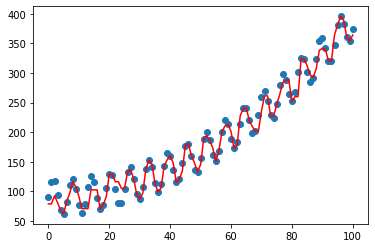

In [0]:
# random forest regression example

from sklearn import ensemble

# plot the points
plt.scatter(P, r)

# use scikit-learn for decision tree regression
ens = ensemble.RandomForestRegressor(n_estimators=2)  # try changing number of trees in the forest!
ens_model = ens.fit(P.reshape(-1, 1), r)

# predict and plot the regression line
pred_ens = ens_model.predict(P.reshape(-1, 1))

# plot the regression line, shown in red 
plt.plot(pred_ens, color='red')

plt.show()